# R-Select and Median Finder Random Algorithms
*by Roberto Esteban López*

As part of the course, now a couple of more interesting algorithms with good bounds, that have better perfomance than the deterministic versions in practice, even thogh, their complexity in time are shared both being $O(n)$. 

R-Select is a generalized version of the median finder algorithm, which given an unsorted array $S$ it returns the $k - th$ smaller value from it, all of these without having to compute all the sorted version of $S$, which with great perfomance in $O(nlogn)$ quicksort can give. In the same abouts, the median finder is a particular version of R-Select which returns the median value of an unsorted array $S$ also in linear time. 

## Median Finder

In [1]:
import numpy as np
import numpy.random as rdm
import time
import matplotlib.pyplot as plt

In [2]:
class timer:
    def __init__(self, prnt=True):
        self.s = 0
        self.prnt = prnt
        
    def tick(self):
        self.s = time.time()
        #return self.s
        
    def tock(self):
        r = time.time() - self.s
        self.s = time.time()
        if self.prnt:
            print("Finished in",r,"s")
        else:
            return r

In [3]:
def quicksort(S, iters=False, DEBUG=False):
    # Function to initialize the calls to quicksorts random-version
    # without the the rest of the arguments.
    upper = len(S) - 1
    S, d = quicksorts(S, 0, upper, 0, DEBUG=DEBUG)
    if iters:
        return S, d
    else:
        return S
    
def quicksorts(S, lower, upper, d, DEBUG=False):
    # S is the array to sort Inplace manner.
    # lower is the lower index of the part of the array to sort
    # upper is the index of the top part of the array to sort
    # d is just to return the number of the function calls it self
    if upper - lower < 1: #Base case
        if DEBUG: print("Base case",S,"range given",lower,",",upper)
        return S, d + 1
    else:
        S_i = range(lower, upper + 1)
        # Draw a pivot in a random manner
        # p is the p-th item of S as the pivot
        p = rdm.choice(S_i)
        d += len(S_i)
        piv = S[p]
        for i in S_i:
            d += 1 #Every iteration in this loop takes constant time.
            x = S[i]
            if x > piv and i < p: # When the value is greater than the pivot and on the left of it
                # Saving the value to move
                S[i] = piv #moving the pivot
                S[p] = x
                p = i #updating the pivot
                if DEBUG: print("1 :",S[lower:upper+1],"piv",piv)
                continue
            if x < piv and i > p: # When the value is smaller than the pivot and on the right of it
                if i - p > 1:
                    S[p] = x
                    aux = S[p + 1] # saving x'
                    S[p + 1] = piv #moving the pivot
                    p = p + 1 #updating the pivot
                    S[i] = aux
                else:
                    S[p] = x
                    S[i] = piv
                    p = i
                if DEBUG: print("2 :",S[lower:upper+1],"piv",piv)
                continue
        if DEBUG: print("S':",S[lower:upper+1],"piv",piv, "on",p,"range:",lower,",",upper)
        S, d = quicksorts(S, lower, p, d + 1, DEBUG=DEBUG)
        S, d = quicksorts(S, p + 1, upper, d + 1, DEBUG=DEBUG)
        return S, d

In [4]:
# Benchmarking the perfomance of quicksort
times = []
iters = []
t = timer(prnt=False)
sizes = range(10, 2001, 100)
for size in sizes:
    a = rdm.choice(10**6,size=size)
    samples_t = []
    samples_i = []
    for sample in range(50):
        t.tick()
        _, d = quicksort(a.copy(), iters=True)
        samples_t.append(t.tock())
        samples_i.append(d)
    times.append(samples_t)
    iters.append(samples_i)
iters_qs = iters.copy()
times_qs = times.copy()

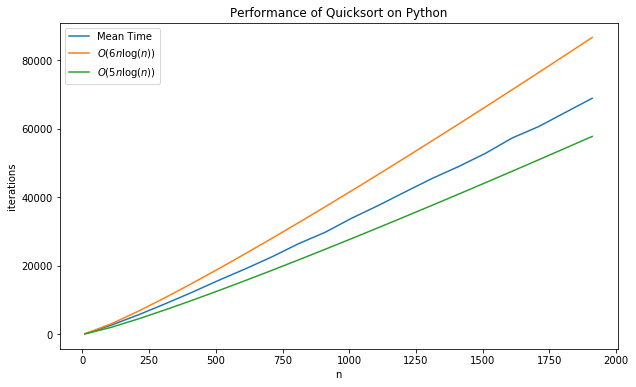

In [5]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(sizes, np.mean(iters_qs, axis=1),label="Mean Time")
axs.plot(sizes, [6*x*np.log(x) for x in sizes], label="$O(6n \log(n))$")
axs.plot(sizes, [4*x*np.log(x) for x in sizes], label="$O(5n \log(n))$")
#axs.plot(sizes, [5*n*np.log(n) + np.power(n,-1/4)/(1 - np.power(n,-1/4))**2 for n in sizes])
#axs.plot(sizes, [5*n*np.log(n) - np.power(n,-1/4)/(1 - np.power(n,-1/4))**2 for n in sizes])
axs.set_xlabel("n")
axs.set_ylabel("iterations")
#axs[1].lenged()

plt.title("Performance of Quicksort on Python")
plt.legend()
plt.show()

## Median finder - Random Algorithm

In [6]:
def median_random(S, Iter=False, DEBUG=False, max_iters=0):
    if DEBUG: print(S)
        
    if max_iters < 1: 
        vegas = True
    else:
        vegas = False
        
    n = len(S)
    tqrt = (np.power(n,3/4))
    sqt = np.sqrt(n)
    d_i = int(np.floor(0.5*tqrt - sqt)) - 1
    u_i = int(np.ceil(0.5*tqrt + sqt)) - 1
    i = 0 #Counting iterations without the constant
    
    while True:
        i += 1
        if not vegas and i > max_iters:
            # This condition checks if the mode is not set in vegas and limit
            # the max iterations to find the median
            if DEBUG: print("Maximum number of iterations reached")
            return None
        
        R = rdm.choice(S, size=int(np.ceil(tqrt)), replace=True)
        i += len(R)
        _, d = quicksort(R,iters=True)
        i += d
        d = R[d_i]
        u = R[u_i]
        C = []
        l_d, l_u = 0, 0
        
        for x in S: # Comparing every element in S to d and u
            i += 1
            if x < d:
                l_d += 1
                continue
            elif d <= x and x <= u:
                C.append(x)
                continue
            else: #if u < x only last condition left
                l_u += 1
                continue
        
        if DEBUG: print("R",R,d,u,"ld",l_d,",lu",l_u,",C",C)
            
        m_ = np.floor(n/2)
        l_C = n - l_d - l_u
        
        if l_d >= m_ or l_u >= m_:
            if DEBUG: print("Failed, case 1")
            continue #The algorithm failed with the random choices
            
        elif l_C > 4 * tqrt:
            if DEBUG: print("Failed, case 2")
            continue #other case where the algorithm failed
            
        else: #The algorithm was successful
            _, d = quicksort(C, iters=True)
            i += d
            m = int(np.floor(n/2) - l_d - 1)
            
            #Saving the median
            if l_C == 1:
                med = C[0]
            else:
                med = C[m]
                
            if DEBUG: print(C, m)
             
            #After success, return the result
            if Iter: 
                return med, i
            else: 
                return med

In [7]:
# Benchmarking the perfomance of median algorithm
times = []
iters = []
for size in sizes:
    a = rdm.choice(10**6,size=size)
    samples_t = []
    samples_i = []
    for sample in range(50):
        t.tick()
        _, d = median_random(a.copy(), Iter=True)
        samples_t.append(t.tock())
        samples_i.append(d)
    times.append(samples_t)
    iters.append(samples_i)
iters_m = iters.copy()
times_m = times.copy()

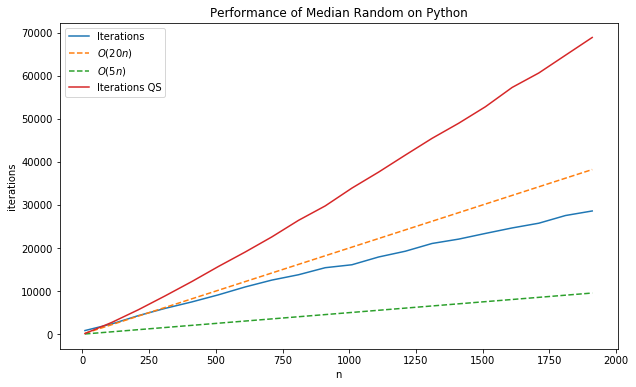

In [8]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(sizes, np.mean(iters_m, axis=1),label="Iterations")
axs.plot(sizes, [20*x for x in sizes], label="$O(20n)$",ls="--")
axs.plot(sizes, [5*x for x in sizes], label="$O(5n)$",ls="--")
axs.plot(sizes, np.mean(iters_qs, axis=1), label="Iterations QS")
axs.set_xlabel("n")
axs.set_ylabel("iterations")

plt.title("Performance of Median Random on Python")
plt.legend()
plt.show()

## R-Select or Quickselect


In [9]:
def Rselect(S, k, Iter=False, DEBUG=False):
    n = len(S)
    S, ans, d = rs(S, k-1, 0, n-1, 0, DEBUG=DEBUG)
    if not Iter:
        return ans
    else:
        return ans, d

def rs(S, k, lower, upper, d, DEBUG=False):
    # R-select programm to find the k-th smaller element in an unordered array
    # Does the operation in-place, giving a partial order to the array
    # S is the array to extract the element
    # k is the desired k-1 -th smaller element in S. taking 0 the smaller due to python indexing
    # lower is the lower bound to analize the array in
    # upper is the upper bound to analize the array in
    # d is the number of calls to itself, as a function
    if upper - lower < 1:
        if DEBUG: print("Base case",S,"range given",lower,",",upper)
        return S, S[k], d + 1
    
    else:
        S_i = range(lower, upper + 1)
        # Draw a pivot in a random manner
        # p is the p-th item of S as the pivot
        p = rdm.choice(S_i)
        d += len(S_i)
        piv = S[p] #Value of the pivot from S
        for i in S_i:
            d += 1 # Every operation inside this loop takes constant time
            # The use of this loop has all movements in it, with the cost of write memory access
            # To change instead of executing a single loop is better to do two.
            x = S[i]
            if x > piv and i < p: # When the value is greater than the pivot and on the left of it
                # Saving the value to move
                S[i] = piv #moving the pivot
                S[p] = x
                p = i #updating the pivot
                if DEBUG: print("1 :",S[lower:upper+1],"piv",piv)
                continue
            if x < piv and i > p: # When the value is smaller than the pivot and on the right of it
                if i - p > 1:
                    S[p] = x
                    aux = S[p + 1] # saving x'
                    S[p + 1] = piv #moving the pivot
                    p = p + 1 #updating the pivot
                    S[i] = aux
                else:
                    S[p] = x
                    S[i] = piv
                    p = i
                if DEBUG: print("2 :",S[lower:upper+1],"piv",piv)
                continue
        if DEBUG: print("S':",S[lower:upper+1],"piv",piv, "on",p,"range:",lower,",",upper)

        if p == k: # Done.
            return S, piv, d + 1
        elif p < k:
            return rs(S, k, p, upper, d + 1, DEBUG=DEBUG)
        else: #p>k is left
            return rs(S, k, lower, p, d + 1, DEBUG=DEBUG)

In [10]:
# Benchmarking the perfomance of median algorithm
times = []
iters = []
for size in sizes:
    a = rdm.choice(10**6,size=size)
    samples_t = []
    samples_i = []
    for sample in range(50):
        t.tick()
        _, d = Rselect(a.copy(), size//2, Iter=True) #Find the median with it
        samples_t.append(t.tock())
        samples_i.append(d)
    times.append(samples_t)
    iters.append(samples_i)
iters_rs = iters.copy()
times_rs = times.copy()

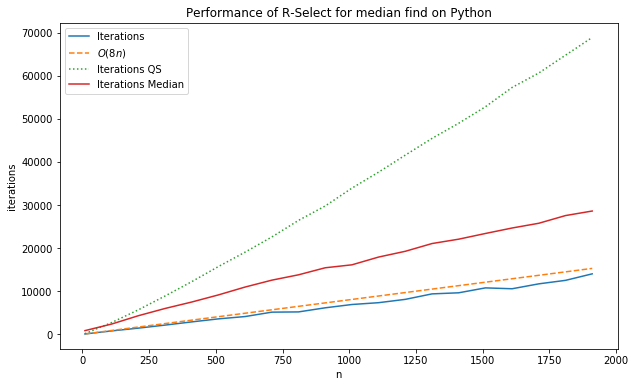

In [11]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(sizes, np.mean(iters_rs, axis=1),label="Iterations")
#axs.plot(sizes, [2*x for x in sizes], label="$2n$")
axs.plot(sizes, [8*x for x in sizes], label="$O(8n)$",ls="--")
axs.plot(sizes, np.mean(iters_qs, axis=1), label="Iterations QS",ls=":")
axs.plot(sizes, np.mean(iters_m, axis=1), label="Iterations Median")
axs.set_xlabel("n")
axs.set_ylabel("iterations")

plt.title("Performance of R-Select for median find on Python")
plt.legend()
plt.show()

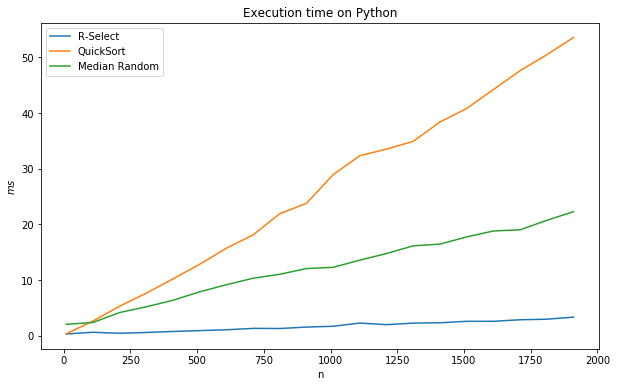

In [12]:
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(sizes, np.mean(times, axis=1)*1000,label="R-Select")
axs.plot(sizes, np.mean(times_qs, axis=1)*1000, label="QuickSort")
axs.plot(sizes, np.mean(times_m, axis=1)*1000, label="Median Random")
axs.set_xlabel("n")
axs.set_ylabel("$ms$")

plt.title("Execution time on Python")
plt.legend()
plt.show()